## Linear Regression

Fit a line to your data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 20

In [17]:
x = np.linspace(0, 10, n)
y = 0.2 * x + 2 + np.random.normal(size=(n,))

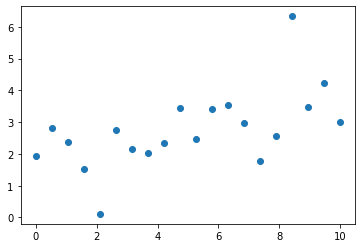

In [18]:
plt.scatter(x,y)

In [19]:
x_hat = x.mean()
y_hat = y.mean()
x_std = x.std()
y_std = y.std()
r     = np.corrcoef(x, y)[0,1]

The best fit line has a slope of r * ( y_std / x_std ) and must pass through ( x_hat, y_hat ).

In [20]:
def l(x): return (r *(y_std/x_std)*(x-x_hat)) + y_hat

In [21]:
a = np.linspace(0,10,100)

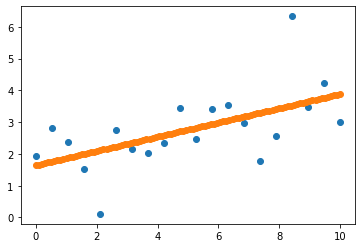

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x,y)
ax1.scatter(a, l(a))
plt.show()